In [1]:
# load modules 

import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
dir_zarr = '/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored_3day_output/run_tracers_restored_zarr/'
ds_model = xr.open_zarr(dir_zarr)

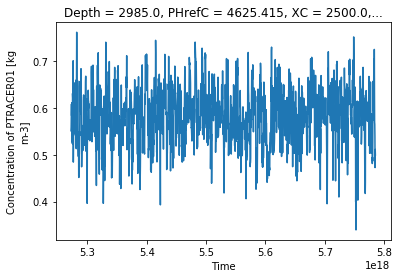

In [3]:
ds_model.PTRACER01.sel(Z=-500, XC=0, YC=1000e3, method='nearest').plot()

## Variance budget

\begin{equation}
\partial_t (\overline{c'^2}/2) + \nabla. (\overline{\mathbf{v}c'^2})/2 = diss  - \overline{\mathbf{v}'c'}.\nabla \overline{c}
\end{equation}

In [4]:
from xgcm import Grid

grid = Grid(ds_model, periodic='X')

In [5]:
dx = ds_model.dxC[0,0]

In [6]:
# tracer eddy terms
tracer = 'T'
cbar = ds_model[tracer].mean('time')
cp = ds_model[tracer] - cbar 
phi = (cp*cp).mean('time')/2

In [7]:
# velocity eddy terms
ubar = ds_model['U'].mean('time')
vbar = ds_model['V'].mean('time')
wbar = ds_model['W'].mean('time')

up = ds_model['U'] - ubar
vp = ds_model['V'] - vbar
wp = ds_model['W'] - wbar

In [8]:
# tracer fluxes 
upcp = (grid.interp(up, 'X') * cp).mean('time')
vpcp = (grid.interp(vp, 'Y', boundary='extend') * cp).mean('time')
wpcp = (grid.interp(wp, 'Z', boundary='extend') * cp).mean('time')

In [9]:
# var transport by mean
ubarcpcp = (grid.interp(ubar, 'X') * phi)
vbarcpcp = (grid.interp(vbar, 'Y', boundary='extend') * phi)
wbarcpcp = (grid.interp(wbar, 'Z', boundary='extend') * phi)

In [11]:
# divergence of above term 
divmeanvartransport = ( grid.interp(grid.diff(ubarcpcp, 'X')/dx, 'X') + 
                        grid.interp(grid.diff(vbarcpcp, 'Y', boundary='extend')/dx, 'Y', boundary='extend') -
                        grid.interp(grid.diff(wbarcpcp, 'Z', boundary='extend'), 'Z', boundary='extend')/ ds_model.drF) 

In [12]:
divmeanvartransport.load()

<xarray.DataArray (Z: 40, YC: 400, XC: 400)>
array([[[ 1.202364e-10,  1.906107e-10, ..., -1.327315e-10,  1.371093e-11],
        [ 6.037605e-10,  5.123358e-10, ..., -2.336522e-10,  2.234813e-10],
        ...,
        [-4.463870e-10, -6.486636e-10, ...,  4.931917e-11, -1.977180e-10],
        [-2.293260e-10, -2.949131e-10, ...,  1.160322e-10, -3.909871e-11]],

       [[ 9.689578e-11,  1.624346e-10, ..., -1.528964e-10, -8.707741e-12],
        [ 2.207395e-11, -7.019080e-11, ..., -7.446496e-10, -2.509744e-10],
        ...,
        [ 2.634884e-10,  7.435294e-11, ...,  8.186292e-10,  5.422022e-10],
        [ 3.119674e-10,  2.575179e-10, ...,  4.961284e-10,  4.450712e-10]],

       ...,

       [[-2.039904e-12, -1.910753e-12, ..., -2.358797e-12, -2.265336e-12],
        [-8.619644e-12, -3.722040e-11, ..., -7.288474e-12,  3.855274e-12],
        ...,
        [-2.160746e-10, -2.088904e-10, ..., -2.067600e-10, -2.115285e-10],
        [-6.478493e-10, -6.144075e-10, ..., -6.444614e-10, -6.263208e-10]]

In [13]:
# var transport by eddy
upcpcp = (grid.interp(up, 'X') * cp * cp).mean('time')/2
vpcpcp = (grid.interp(vp, 'Y', boundary='extend') * cp * cp).mean('time')/2
wpcpcp = (grid.interp(wp, 'Z', boundary='extend') * cp * cp).mean('time')/2

In [14]:
# divergence of above term 
diveddyvartransport = ( grid.interp(grid.diff(upcpcp, 'X')/dx, 'X') + 
                        grid.interp(grid.diff(vpcpcp, 'Y', boundary='extend')/dx, 'Y', boundary='extend') -
                        grid.interp(grid.diff(wpcpcp, 'Z', boundary='extend'), 'Z', boundary='extend')/ ds_model.drF) 

In [15]:
diveddyvartransport.load()

<xarray.DataArray (Z: 40, YC: 400, XC: 400)>
array([[[ 6.952065e-10,  6.883939e-10, ...,  1.730921e-10,  4.945581e-10],
        [-4.036305e-09, -5.074646e-09, ..., -3.281607e-09, -3.360683e-09],
        ...,
        [-3.888262e-09, -4.055650e-09, ..., -4.294542e-09, -3.917676e-09],
        [-2.341106e-09, -1.726003e-09, ..., -2.585619e-09, -2.683789e-09]],

       [[ 6.923376e-10,  6.711668e-10, ...,  2.078072e-10,  5.062704e-10],
        [-5.386074e-09, -5.995726e-09, ..., -4.154749e-09, -4.375453e-09],
        ...,
        [-4.281383e-09, -4.487082e-09, ..., -4.770760e-09, -4.415619e-09],
        [-2.572877e-09, -2.146435e-09, ..., -2.553703e-09, -2.726566e-09]],

       ...,

       [[ 3.300527e-12,  3.324102e-12, ...,  4.007418e-12,  4.670660e-12],
        [ 4.061634e-11,  3.261767e-11, ...,  1.772337e-11,  3.109194e-11],
        ...,
        [-2.899962e-10, -4.719969e-10, ..., -4.906243e-10, -3.443591e-10],
        [-2.041596e-10, -6.688305e-10, ..., -6.320784e-10, -3.749332e-10]]

In [16]:
# flux projection on mean grad 
# the interpolation can be reduced by not having brought to the fluxes to center point early on
Fgradcbar = ( upcp * grid.interp(grid.diff(cbar, 'X')/dx,'X') + 
              vpcp * grid.interp(grid.diff(cbar, 'Y', boundary='extend')/dx, 'Y', boundary='extend')  
             -wpcp * grid.interp(grid.diff(cbar, 'Z', boundary='extend'), 'Z', boundary='extend')/ds_model.drF)

In [17]:
Fgradcbar.load()

<xarray.DataArray (Z: 40, YC: 400, XC: 400)>
array([[[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 1.079354e-08,  8.103153e-09, ..., -4.021545e-09,  2.019502e-09],
        ...,
        [-1.225753e-09, -1.259990e-09, ..., -1.149537e-09, -1.172612e-09],
        [-3.581535e-10, -4.579956e-10, ..., -3.206424e-10, -3.007432e-10]],

       [[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 1.065505e-08,  8.063492e-09, ..., -3.497701e-09,  2.410580e-09],
        ...,
        [-4.402332e-10, -5.031657e-10, ..., -4.528044e-10, -4.412768e-10],
        [ 5.876009e-10,  5.541934e-10, ...,  5.438591e-10,  6.172891e-10]],

       ...,

       [[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [-1.445580e-11, -1.738657e-11, ..., -9.534035e-12, -9.754081e-12],
        ...,
        [ 1.131941e-10,  2.314465e-10, ...,  1.530047e-10,  1.148018e-10],
        [-1.478927e-09, -1.444826e-09, ..., -1.442743e-09, -1.473400e-09]]

In [18]:
residual = divmeanvartransport + diveddyvartransport + Fgradcbar

### Some plots

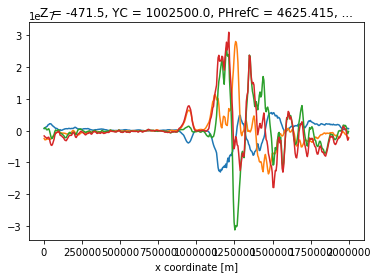

In [28]:
Fgradcbar.sel(YC=1000e3, Z=-500, method='nearest').plot(label = 'Flux')
divmeanvartransport.sel(YC=1000e3, Z=-500, method='nearest').plot(label ='mean div')
diveddyvartransport.sel(YC=1000e3, Z=-500, method='nearest').plot(label ='eddy div')
(divmeanvartransport + diveddyvartransport).sel(YC=1000e3, Z=-500, method='nearest').plot(label = 'eddy+mean')
plt.legend()

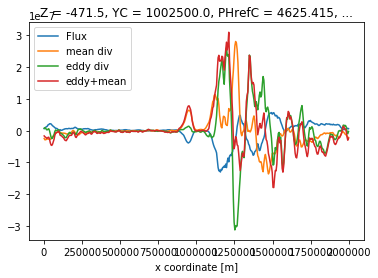

In [29]:
Fgradcbar.sel(YC=1000e3, Z=-500, method='nearest').plot(label = 'Flux')
divmeanvartransport.sel(YC=1000e3, Z=-500, method='nearest').plot(label ='mean div')
diveddyvartransport.sel(YC=1000e3, Z=-500, method='nearest').plot(label ='eddy div')
(divmeanvartransport + diveddyvartransport).sel(YC=1000e3, Z=-500, method='nearest').plot(label = 'eddy+mean')
plt.legend()

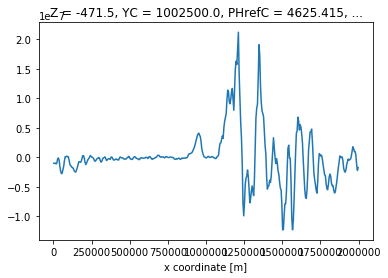

In [30]:
(divmeanvartransport + diveddyvartransport+Fgradcbar).sel(YC=1000e3, Z=-500, method='nearest').plot(label = 'eddy+mean')

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

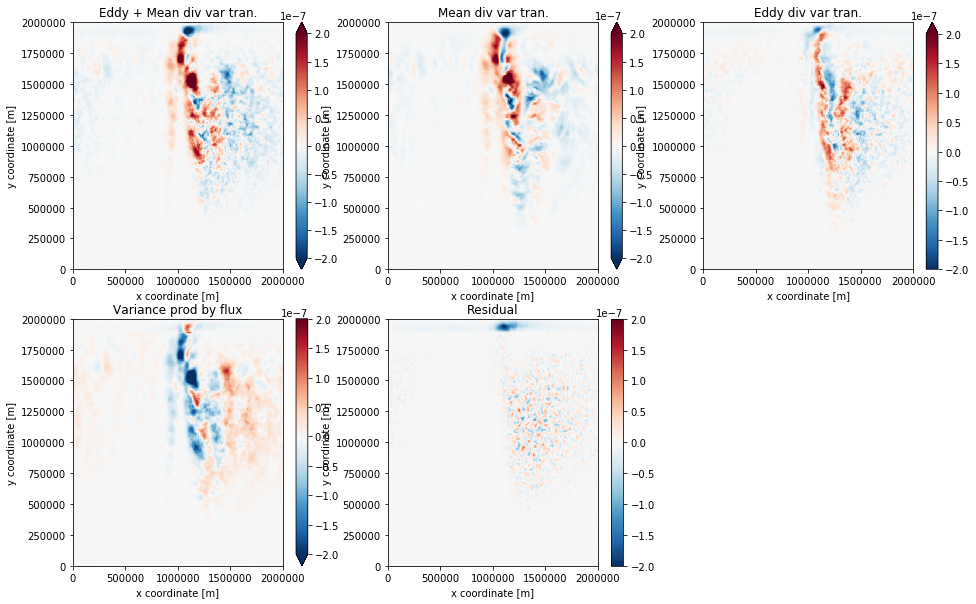

In [34]:
plt.figure(figsize=(16,10))

plt.subplot(231)
(divmeanvartransport/2 + diveddyvartransport/2).sel(Z=-500, method='nearest').plot(vmin=-2e-7)
plt.title('Eddy + Mean div var tran.')

plt.subplot(232)
(divmeanvartransport/2).sel(Z=-500, method='nearest').plot(vmin=-2e-7)
plt.title('Mean div var tran.')

plt.subplot(233)
(diveddyvartransport/2).sel(Z=-500, method='nearest').plot(vmin=-2e-7)
plt.title('Eddy div var tran.')

plt.subplot(234)
Fgradcbar.sel(Z=-500, method='nearest').plot(vmin=-2e-7)
plt.title('Variance prod by flux')

plt.subplot(235)
(divmeanvartransport/2+diveddyvartransport/2+Fgradcbar).sel(Z=-500, method='nearest').plot(vmin=-2e-7)
plt.title('Residual')

plt.tight_layout

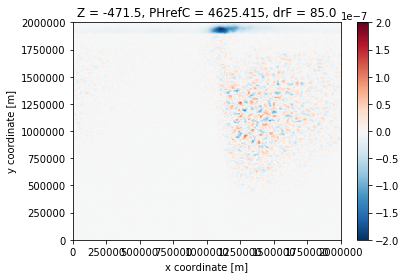

In [19]:
residual.sel(Z=-500, method='nearest').plot(vmin=-2e-7)